# Exercice 2 : Pyton

Nous allons maintenant nous intéresser à **l'algorithme de Kruskal**. Ce dernier s'applique uniquement aux **weighted graph**. Ces derniers sont des graphes où les arrêts ont des poids, représentant par exemple une distance. L'algorithme de Kruskal a pour but de trouver un **minimum spanning tree**. Un minimum spanning tree S de G est une sous-graphe connexe de G tel que :
- 1) V' = V, C'est à dire que tout les sommets de G sont aussi dans S
- 2) (V',E') ne contient pas de cycle (pas de cycle dans S)
- 3) S est le graphe satisfaisant 1) et 2) et ayant la plus petite somme des poids

## a) Familiarisation avec la notation

Pour cette exercice, nous allons utiliser une structure différente que celle dans l'exercice 1. Prenez connaissance du code ci-dessous et lisez les commentaires annoté. Vous n'avez pas besoin de la comprendre dans son intégralité. Il sera plus clair de ce à quoi sert ce genre de code lorsque vous étudierez la programmation orienté objet.

In [22]:
class Graph:
    def __init__(self, vertices):#permet de créer un graphe lorsqu'on écrit p.ex Graph(6), il faut notamment indiquer le nb de sommet
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):#ajoute une arrête entre le sommet u et v avec un poids w
        self.graph.append([u, v, w])

    def find(self, parent, i):#Correspond à la fonction Find-set(x) du cours
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):#Correspond à la fonction Union(x,y) du cours
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

L'algorithme de Kruskal fonctionne de la manière suivante :
- 1) Classer les arrêtes par ordre croissant de poids
- 2) Prendre l'arrête avec le poids le plus faible et l'ajouter à l'arbre (si 2 arrêtes ont le même poids, choisir arbitrairement une des 2).
- 3) Vérifiez que l'arrête ajoutée ne crée pas de cycle, si c'est le cas, supprimez la.
- 4) Répétez les étapes 2) et 3) jusqu'à ce que tout les sommets soient atteints.

Appliquons cet algorithme au graphe suivant :

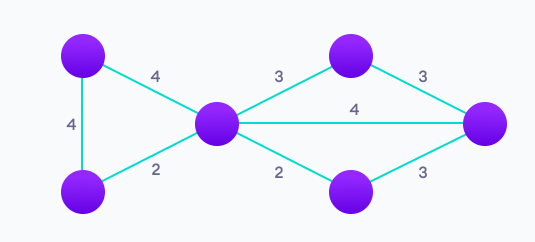

Le bout de code suivant permet de créer le graphe :

In [23]:
g = Graph(6)
g.add_edge(0, 1, 4)
g.add_edge(0, 2, 4)
g.add_edge(1, 2, 2)
g.add_edge(1, 0, 4)
g.add_edge(2, 0, 4)
g.add_edge(2, 1, 2)
g.add_edge(2, 3, 3)
g.add_edge(2, 5, 2)
g.add_edge(2, 4, 4)
g.add_edge(3, 2, 3)
g.add_edge(3, 4, 3)
g.add_edge(4, 2, 4)
g.add_edge(4, 3, 3)
g.add_edge(5, 2, 2)
g.add_edge(5, 4, 3)

De façon intuitive, si le graphe a V sommets, combien d'arrête le minimum spanning tree devrait-il avoir ? V-1

## b) Exercice papier 

Appliquez l'algorithme de Kruskal sur le graphe ci-dessus pour trouver le minimum spanning tree:
- 1) Classez les arrêtes par ordre croissant de poids
- 2) Répétez les étapes 2 et 3)
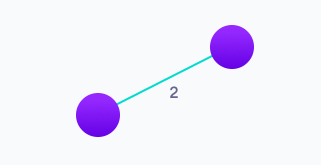
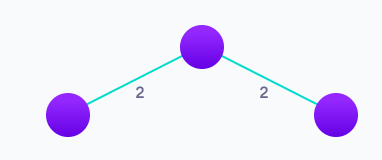
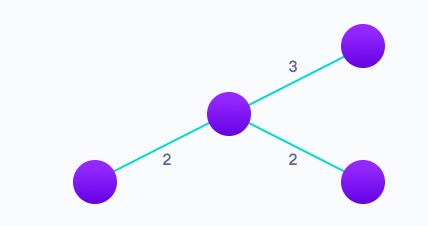
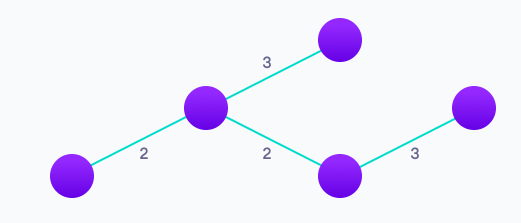
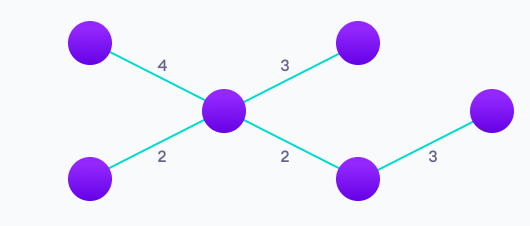
- 3) Tout les sommets sont atteints. Nous pouvons stopper l'algorithme.
Quel est le poids du minimum spanning tree ? 14

Voici l'algorithme de Kruskal en version python : Parcourez le code et les commentaires afin de vous assurer que vous en avez bien compris le fonctionnement.

In [27]:
def kruskal_algo(Graph):
        result = []#Permettra de stocker le résultat
        i, e = 0, 0 #Index utilisé dans l'algorithme
        
        Graph.graph = sorted(Graph.graph, key=lambda item: item[2]) #Trie les arrêtes par poids croissant, étape 1)
        parent = []
        rank = []
        
        
        for node in range(Graph.V):#Cette boucle parcourt tout les sommets du graphes et crée un ensemble pour chacun d'entre eux
            parent.append(node)
            rank.append(0)
          
        #Tant que le nombre d'arrête est inférieur à V-1, notre sous-graphe n'atteint pas tout les sommets -> on continue
        while e < Graph.V - 1:
            
            u, v, w = Graph.graph[i] #self.graph contient les arrêtes par ordre croissant de poids, on commence avec i = 0
            i = i + 1               #puis à l'itération suivante on voudra avoir la 2ème arrête la plus légère, donc on 
                                    #incrémente.
                
            x = Graph.find(parent, u)#Ces 2 lignes des codes permettent de rechercher et de stocker à quel ensemble 
            y = Graph.find(parent, v)#appartiennent u et v.
            
            if x != y: #Si u et v font déjà parti du minimum spanning tree, i.e. u et v appartiennent au même ensemble
                       #Alors on ne veut pas ajouter cette arrête au minimum spanning-tree, d'ou le x!=y
                e = e + 1 #Si u et v sont d'ensemble différent, on a atteint un sommet de plus donc on incrémente
                result.append([u, v, w])#On ajoute la nouvelle arrête au résultat
                Graph.apply_union(parent, rank, x, y)#On fusionne l'ensemble auquel appartient v à celui auquel apparient u
        for u, v, weight in result:
            print("%d - %d: %d" % (u, v, weight))#méthode permettant d'imprimer le résultat
        
        return result

In [29]:
kruskal_algo(g)

1 - 2: 2
2 - 5: 2
2 - 3: 3
3 - 4: 3
0 - 1: 4


[[1, 2, 2], [2, 5, 2], [2, 3, 3], [3, 4, 3], [0, 1, 4]]

# Exercice Papier : Social Network analysis

Comme il a été expliqué dans l'introduction de l'exercice 1, les graphes peuvente être utilisé pour représenter plusieurs choses. L'une d'entre elles est la représentation de votre réseau d'ami. Imaginez que vous possédiez une liste de vos amis ainsi que des amis de vos amis (qui ne sont pas nécessairement vos amis). Cette liste peut-être représentée sous forme de graphe. Dans ce graphe :

- A quoi correspondent les arrêtes et les noeuds ? Les arrêtes représentent un lien d'amitié et les noeuds représentent les personnes. 
- Faut-il utiliser un graphe dirigé ? Non, si l'on considère qu'une relation d'amitié est bilatérale. A noter que pour instagram, l'utilisation d'un graphe dirigé sera plus utile (on peut suivre quelqu'un sans que cette dernière nous suive).


Supposez que vous disposiez du graphe des relations sociales et que vous voudriez trouver les éléments suivants :

- 1) Votre ami qui a le plus d'ami
- 2) Découvrir quels amis à vous se connaissent
- 3) Listez vos amis qui pourraient vous présenter quelqu'un que vous ne connaissez pas (ami d'ami qui n'est pas votre ami)

Décrivez brièvement quel(s) critères vous devriez utiliser pour trouver ces éléments.

- 1) Trouver le sommet relié à vous qui à le degré le plus élevé
- 2) Premièrement, les 2 personnes doivent être mes amis donc reliées à moi, mais de  plus elles doivent être reliés entre elles. Par conséquent, cela correspond à un cycle dans le graphe. Il y a autant d'amis qui se connaissent que de cycle dans le graphe
- 3) Il ne doit pas y avoir d'arrête me reliant avec l'ami de mon ami


Vous voulez maintenant ajouter sur ce graphe une nouvelle personne, mais cette dernière n'est ni votre ami, ni l'ami d'un de vos amis. Quel sera son degré dans le graphe ? Puisqu'il n'a aucun lien avec les personnes du graphes, le degré du nouveau sommet sera de 0.

Appliquons maintenant ceci-à une graphe réel :


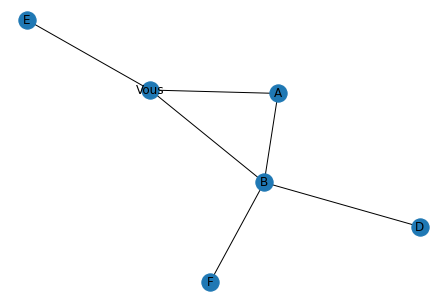

In [4]:
# FACEBOOK
# Importer le package necessaire
import matplotlib.pyplot as plt
import networkx as nx

# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['A', 'B','Vous' , 'D', 'E', 'F']
G.add_nodes_from(list_nodes)

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('A', 'Vous')
G.add_edge('Vous', 'E')
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('B', 'F')
G.add_edge('Vous', 'B')

# Montrer le graphe
nx.draw(G,with_labels = True)
plt.show()

Retrouvez les éléments suivants :
- 1) Votre ami qui a le plus d'ami : B
- 2) Découvrir quels amis à vous se connaissent : B et A
- 3) Listez vos amis qui pourraient vous présenter quelqu'un que vous ne connaissez pas : B

Supposez maintenant que vous travaillez chez facebook, qui a récemment acheté Whatsapp et que vous disposiez des 2 graphes représentant respectivement Facebook et Whatsapp. Pouvez-vous déterminer à qui correspondent les gens de facebook sur whatsapp ?

Graphe de Facebook :


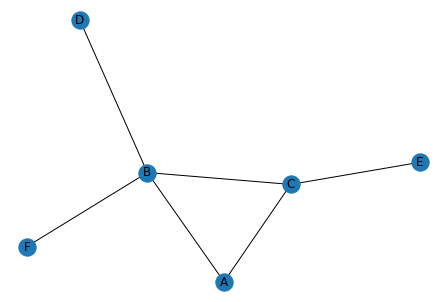

In [10]:
# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['A', 'B','C' , 'D', 'E', 'F']
G.add_nodes_from(list_nodes)

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('A', 'C')
G.add_edge('C', 'E')
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('B', 'F')
G.add_edge('C', 'B')


# Montrer le graphe
print('Graphe de Facebook :')
nx.draw(G,with_labels = True)
plt.show()

Graphe de Whatsapp :


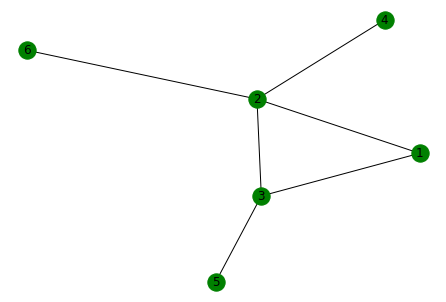

In [12]:
# Initialiser un graphe non dirigé
G = nx.Graph()

# Ajouter des noeuds au graphe à partir d'une liste
list_nodes = ['1','2','3' , '4', '5', '6']
G.add_nodes_from(list_nodes)

# Ajouter les liens entre les noeuds et leur poids respectif
G.add_edge('1', '3')
G.add_edge('3', '5')
G.add_edge('1', '2')
G.add_edge('2', '4')
G.add_edge('2', '6')
G.add_edge('3', '2')

# Montrer le graphe
print('Graphe de Whatsapp :')
nx.draw(G,with_labels = True, node_color='g' )
plt.show()

- B correspond à 2
- A correspond à 1
- C correspond à 3
- E correspond à 5

Les personnes D et F ne peuvent pas être dissociées, on ne peut donc pas savoir à qui elles correspondent sur whatsapp.